<a href="https://colab.research.google.com/github/atolman01/Data_Cleaning_Halloween_Style/blob/main/Data_Cleaning_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
#os.chdir("/content/drive/My Drive/Data Cleaning/Data_Cleaning_Halloween_Style")
%cd /content/drive/My Drive/Data Cleaning/Data_Cleaning_Halloween_Style

Mounted at /content/drive/
/content/drive/My Drive/Data Cleaning/Data_Cleaning_Halloween_Style


In [3]:
import pandas as pd
import numpy as np

#instead of using default encoding="utf-8", need to use encoding="ISO-8859-1"
#use python engine instead of c engine
with open("candyhierarchy2017.csv",'r', encoding="ISO-8859-1") as reader:
  df = pd.read_csv(reader, header=0, engine='python')


Reference to encoding hint : https://stackoverflow.com/questions/19699367/for-line-in-results-in-unicodedecodeerror-utf-8-codec-cant-decode-byte

In [ ]:
#print the first 10 rows of my dataframe
df.head(10)

---

**What are some of the problems with the data?**

1. Invalid column values
2. Columns are inconsistent and not uniform
3. Missing values
  

####**Why is dirty data problematic?**

Dirty data is problematic because it decreases the integrity and quality of data.

Data is used to make informative decisions. In order to make informative decisions, our data MUST have integrity. For example, we can recall someone in our life who is a man/woman of integrity. They are honest and obtain high moral standards. We want our data to have the same characteristic. We want our data to be honest and hold high standards. 


This two minute read about integrity in the workplace is eye opening.
https://altaverba.be/en/the-integrity-threshold/

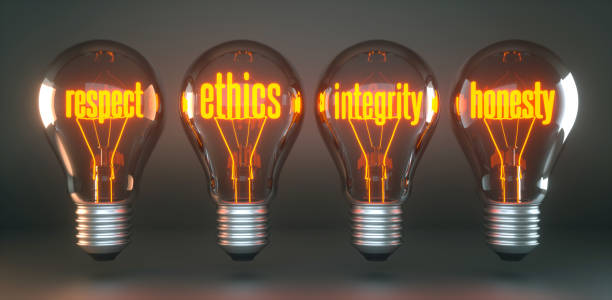

*Photo from istockphoto.com*

The integrity threshold holds true to everything, especially when cleaning data. 

    Let's say you are working for a company called GreatBigDataCompany and your manager 
    tells you to clean a dataset. You take the dataset, look at it, and only delete the 
    rows that have all NULL values. You proceed to tell your manager the dataset is 
    cleaned and they can start analyzing it. 
 
Not only does the manager lose integrity in the dataset, but also you as an employee. Don't lower the intergrity threshold, raise it.


**How does one determine the integrity and quality of data?**

    Validity: Constrain what values are allowed in a single column
              Example: a gender column with either male or female

    Accuracy: are the values correct
              In order to know if a value is accurate, compare it 
              to a known and accepted value. 


    Consistency: when records do not contradict each other
                 Example: 
                        A record in the database says Mary went to Grand Home 
                        Furnishings and bought a couch at 11:04AM.
                          
                        Another record says Mary went to Ashley's and bought a 
                        television at 11:04AM on the same day. 
                        
                        Mary can't be in two places at once.

    Completeness: all required data is available in dataset
                  To know if your dataset is complete or not, find the percentage of missing values in your dataset. 


    Uniformity: always having the same form

---
###**Approach 1 to Consistent Columns**

Here we will use control and data structures with Python to clean our columns up. 

**In pandas, axis=0 are rows and axis=1 are columns**

In [ ]:
# list of candies
candies = ["100 Grand bar"
,'3 Musketeers'
,'One dime'
,'One quarter'
,'Air Heads'
,'Almond Joy'	
,'Baby Ruth'
,'Black jacks'	
,'Black Licorice'
,'Bonkers'
,'Boston Baked Beans'
,'Bottle Caps'
,'Cadbury Creme Eggs'
,'Candy Corn'	
,'Caramel Apple Pops'	
,'Caramellos'
,'Charleston Chew'	
,'Chewey Lemonhead Fruit Mix'	
,'Chiclets'	
,'Chick-o-Sticks'
,'Coffee Crisp'
,'Dots'
,'Dum Dums'
,'Fruit Chews'	
,'Fun Dip'	
,'Gobstopper'	
,'Goo Goo Clusters'
,'Haribo Gold Bears'	
,'Haribo Happy Cola'
,'Haribo Sour Bears'
,'Haribo Twin Snakes'	
,'Heath'
,'Hershey\'s Kisses'	
,'Hershey\'s Krackel'	
,'Hershey\'s Milk Chocolate'
,'Hershey\'s Dark Chocolate'	
,'Hershey\'s Special Dark'
,'Jawbusters'
,'Jolly Ranchers'
,'Junior Mints'
,'Kinder Happy Hippo'
,'Kit Kat'	
,'Laffy Taffy'
,'Lemonhead'	
,'Lifesavers big ring gummies'	
,'Lindt truffle'
,'Lollipops'
,'Mars'
,'Mary Janes'
,'Maynards'
,'Peanut butter M&M\'s'
,'M&M\'s'	
,'Mike & Ike'	
,'Milk Duds'
,'Milky Way'
,'Milky Way Midnight'	
,'Milky Way Simply Caramel'	
,'Mounds'
,'Mr Good Bar'
,'Nerds'	
,'Butterfinger'	
,'Crunch'	
,'Nik L Nip'	
,'Now & Later'
,'Payday'	
,'Peanut M&Ms'
,'Peeps'	
,'Pixie Sticks'	
,'Pop Rocks'	
,'Red vines'
,'Red Licorice'	
,'Reese\'s Miniatures'
,'Reese\'s Peanut Butter cup'
,'Reese\'s pieces'
,'Reese\'s stuffed with pieces'
,'Reggie Jackson Bar'
,'Ring pop'
,'Rolos'	
,'Root Beer Barrels'
,'Runts'
,'Sixlets'
,'Skittles'
,'Skittles wildberry'
,'Nestle Smarties'
,'Necco Wafers'
,'European Smarties'
,'Snickers'
,'Snickers Crisper'
,'Sour Patch Kids'
,'Sour Patch Tricksters'
,'Starburst'
,'Strawberry bon bons'
,'Sugar Babies'
,'Sugar Daddy'
,'Super Bubble'
,'Swedish Fish'
,'Sweet tarts'
,'Take 5'
,'Tic tacs'
,'Tootsie Pop'
,'Tolberone'
,'Tootsie Roll Juniors'
,'Tootsie Roll Midgies'
,'Tootsie Roll Snack Bars'
,'Trolli Sour Bites'
,'Trail mix'
,'Twix'
,'Twizzlers'
,'Warheads'
,'Welch\'s Fruit Snacks'
,'Werther\'s Original Caramel'
,'Whoppers'
,'York Peppermint Patties']

# a dictionary ( key - is the current column name we want to change : value - the new column name)
cols_rename = {"anonymous brown globs that come in black and orange wrappers	(a.k.a. mary janes)":"mary janes"
            ,"bonkers (the candy)":"bonkers"
            ,"state, province, county, etc":"state"
            ,"chick-o-sticks (we donõt know what that is)":"chick-o-sticks"
            ,"gummy bears straight up":"gummy bears"
            ,"jolly ranchers (good flavor)":"jolly ranchers"
            ,"joyjoy (mit iodine!)":"almond joy"
            ,"now'n'laters":"now & later"
            ,"sourpatch kids (i.e. abominations of nature)":"sour patch kids"
            ,"tolberone something or other":"tolberone"
            ,"smarties (commonwealth)":"european smarties"
            ,"smarties (american)":"american smarties"
            ,"licorice (not black)":"red licorice"
            ,"licorice (yes black)":"black licorice"
            ,"going out?":"going out"
            ,"good n' plenty" : "good & plenty"
            ,"laffytaffy" : "laffy taffy"
            ,"mike and ike" : "mike & ike"
            ,"mr. goodbar" : "mr good bar"
            ,"three musketeers" : "3 musketeers"
            ,"mint kisses" : "hershey\'s mint kisses"
            ,"pixy stix" : "pixie sticks"
            ,"nestle crunch" : "crunch"
            ,"heath bar" : "heath"
            ,"hersheyõs milk chocolate":"hershey's milk chocolate"
            ,"lemonheads":"lemonhead"
            ,"reeseõs peanut butter cups":"reese's peanut butter cup"
            ,"peanut m&mõs":"peanut butter m&m's"
            ,"regular m&ms":"m&m's"}

#instead of dealing with a mix of upper and lower case, just make them all lower case
candies = [name.lower() for name in candies]

In [ ]:
# deletes the columns we do not want 
# IMPORTANT : be careful, only execute this once
# After deleting the columns, if you execute this again the columns
#   will already be gone and it will return COLUMN NOT FOUND
def delete_columns(df,cols_to_drop):
  
  df = df.drop(cols_to_drop,axis=1)
  return df

# get the columns we know we want to delete to make it easier with slicing columns later on!
# Plus these columns have nothing to do with Trick or Treating!
drop = df.loc[:,'Q7: JOY OTHER':'Click Coordinates (x, y)'].append(df[['Internal ID']])
drop_cols = [x for x in drop.columns]

#uncomment this line when rexecuting for the first time
# remember we only want to delete these columns once
df = delete_columns(df,drop_cols)

In [ ]:

#strip columns in our original dataframe of whitespace and lower case columns
df.columns = [c[4:].strip().lower() for c in df.columns]

#find all columns in dataframe that did not have a match in the candies list
no_matches = [c for c in df.columns if c not in candies]

# returns a tuple with two lists : one with irrelevant columns we do not need, the other with columns we renamed 
def get_unwanted_cols(no_matches,cols_rename):
 renamed = []
 irrelevant_cols = []

 for current_name in no_matches:
   if current_name in cols_rename:
     renamed.append(cols_rename[current_name])
   elif current_name in ["country","gender","age"]:
     renamed.append(current_name)
   else:
     irrelevant_cols.append(current_name)

 return irrelevant_cols


#call all your functions to clean your dataframe columns
irrelevant_columns = get_unwanted_cols(no_matches,cols_rename)
df = delete_columns(df, irrelevant_columns)
df.rename(columns=cols_rename,inplace=True)


###**Approach 2 to Consistent Columns**

This approach is more of a hard-coded solution than the one above. 

You can physically write out every single column you want to delete. But datasets will often have tons and tons of columns that take too much time to hard-code.

In [ ]:

# a function to rename columns in our dataframe
# returns a new dataframe
def rename_df_columns(df):
  
  df.rename(columns={"anonymous brown globs that come in black and orange wrappers	(a.k.a. mary janes)":"mary janes"
            ,"bonkers (the candy)":"bonkers"
            ,"state, province, county, etc":"state"
            ,"chick-o-sticks (we donõt know what that is)":"chick-o-sticks"
            ,"gummy bears straight up":"gummy bears"
            ,"jolly ranchers (good flavor)":"jolly ranchers"
            ,"joyjoy (mit iodine!)":"almond joy"
            ,"now'n'laters":"now & later"
            ,"sourpatch kids (i.e. abominations of nature)":"sour patch kids"
            ,"tolberone something or other":"tolberone"
            ,"smarties (commonwealth)":"european smarties"
            ,"smarties (american)":"american smarties"
            ,"licorice (not black)":"red licorice"
            ,"licorice (yes black)":"black licorice"
            ,"going out?":"going out"
            ,"good n' plenty" : "good & plenty"
            ,"laffytaffy" : "laffy taffy"
            ,"mike and ike" : "mike & ike"
            ,"mr. goodbar" : "mr good bar"
            ,"three musketeers" : "3 musketeers"
            ,"mint kisses" : "hershey\'s mint kisses"
            ,"pixy stix" : "pixie sticks"
            ,"nestle crunch" : "crunch"
            ,"heath bar" : "heath"
            ,"hersheyõs milk chocolate":"hershey's milk chocolate"
            ,"lemonheads":"lemonhead"
            ,"reeseõs peanut butter cups":"reese's peanut butter cup"
            ,"peanut m&mõs":"peanut butter m&m's"
            ,"regular m&ms":"m&m's"}, inplace=True)
  return df

#deletes all unwanted columns from our dataframe
#returns a new dataframe
def delete_df_columns(df):
  df = df.drop(['Internal ID','Q6 | Any full-sized candy bar','Q6 | Bonkers (the board game)','Q6 | Box\'o\'Raisins'
    , 'Q6 | Broken glow stick', 'Q6 | Candy that is clearly just the stuff given out for free at restaurants'
    , 'Q6 | Cash, or other forms of legal tender', 'Q6 | Chardonnay', 'Q6 | Creepy Religious comics/Chick Tracts'
    , 'Q6 | Dental paraphenalia', 'Q6 | Dove Bars', 'Q6 | Fuzzy Peaches','Q6 | Generic Brand Acetaminophen'
    , 'Q6 | Glow sticks', 'Q6 | Gum from baseball cards', 'Q6 | Healthy Fruit','Q6 | Hugs (actual physical hugs)'
    , 'Q6 | Jolly Rancher (bad flavor)','Q6 | Kale smoothie', 'Q6 | Senior Mints', 'Q6 | Blue M&M\'s', 'Q6 | Red M&M\'s', 'Q6 | Green Party M&M\'s'
    , 'Q6 | Independent M&M\'s', 'Q6 | Abstained from M&M\'ing.' , 'Q6 | Mint Juleps', 'Q6 | Pencils', 'Q6 | Real Housewives of Orange County Season 9 Blue-Ray'
    , 'Q6 | Sandwich-sized bags filled with BooBerry Crunch', 'Q6 | Spotted Dick', 'Q6 | Those odd marshmallow circus peanut things'
    , 'Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein', 'Q6 | Vicodin', 'Q6 | Whatchamacallit Bars'
    , 'Q6 | White Bread','Q6 | Minibags of chips','Q6 | Hard Candy','Q6 | Whole Wheat anything', 'Q7: JOY OTHER', 'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS'
    , 'Unnamed: 113', 'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]','Q12: MEDIA [ESPN]','Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],axis=1)

  return df

#call functions above and return 
# new dataframe with changes
def clean_df_columns(df):
  temp_list = []
  removed_col = delete_df_columns(df)
  
  for c in removed_col.columns:                # go through all columns that are left in dataframe
    temp_list.append(c[4:].strip().lower())    #slice the name, and strip it of all whitespace and lower case 
  removed_col.columns = temp_list
  renamed_df = rename_df_columns(removed_col) #rename columns
  return renamed_df


clean_df_col = clean_df_columns(df)
print(clean_df_col.columns)



Index(['going out', 'gender', 'age', 'country', 'state', '100 grand bar',
       'mary janes', 'black jacks', 'bonkers', 'bottle caps', 'butterfinger',
       'cadbury creme eggs', 'candy corn', 'caramellos', 'chick-o-sticks',
       'chiclets', 'coffee crisp', 'dots', 'goo goo clusters', 'good & plenty',
       'gummy bears', 'heath', 'hershey's dark chocolate',
       'hershey's milk chocolate', 'hershey's kisses', 'jolly ranchers',
       'almond joy', 'junior mints', 'kinder happy hippo', 'kit kat',
       'laffy taffy', 'lemonhead', 'red licorice', 'black licorice',
       'lindt truffle', 'lollipops', 'mars', 'maynards', 'mike & ike',
       'milk duds', 'milky way', 'm&m's', 'peanut butter m&m's',
       'hershey's mint kisses', 'mr good bar', 'necco wafers', 'nerds',
       'crunch', 'now & later', 'peeps', 'pixie sticks',
       'reese's peanut butter cup', 'reese's pieces', 'reggie jackson bar',
       'rolos', 'skittles', 'american smarties', 'european smarties',
       'sni

---

In [ ]:
#drop rows with all NaN values 

no_nulls = clean_df_col.dropna(axis=0,how='all')

#print(no_nulls)

filtered = no_nulls[no_nulls['going out'] == 'Yes']
filtered.reset_index()
print(filtered)